In [212]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [213]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [214]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [215]:
y = df['Survived'] # selects the target variable
X = df.iloc[:, 1:3] # selects the features variable

In [216]:
# splits the dataset into training and testing set, with 20% of data moved to testing side. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

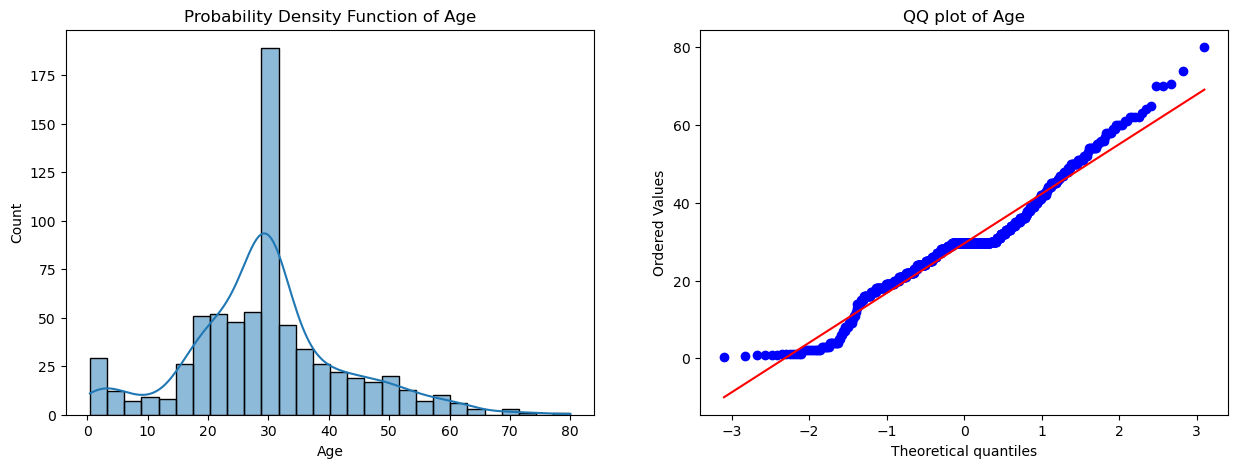

In [217]:
# Plotting the Age columns to know it's distribution
plt.figure(figsize=(15, 5))

plt.subplot(121)                               # 1 in 121 refers no. of rows, 2 refers no. of cols and 1 refers plot 1 of two subplots
sns.histplot(X_train['Age'], kde=True)         # kde = kernel density function, plots a density curve in the graph.
plt.title("Probability Density Function of Age")

plt.subplot(122)
stats.probplot(X_train['Age'], plot=plt)
plt.title("QQ plot of Age")

plt.show()

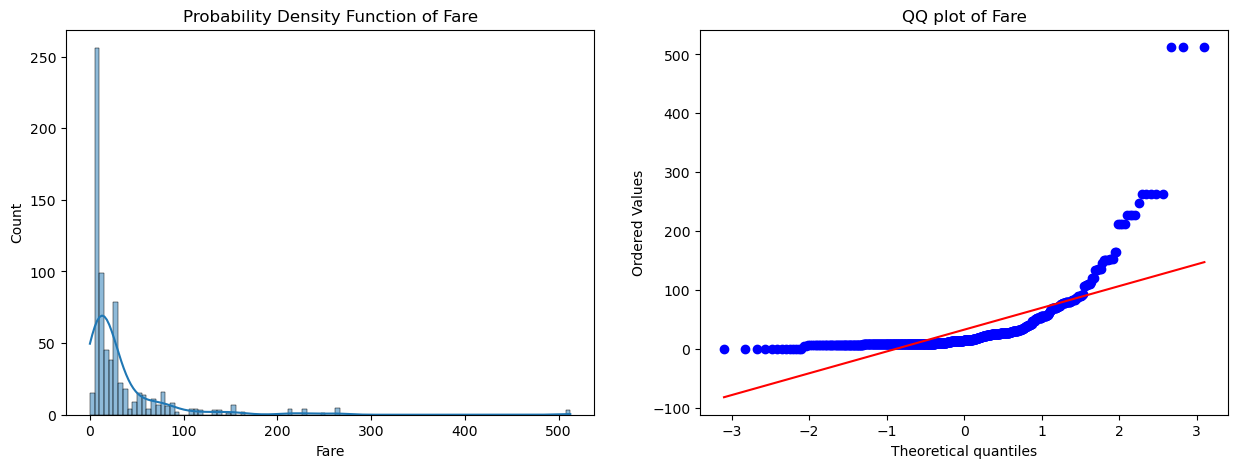

In [218]:
# Plots for the 'Fare' columns
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title("Probability Density Function of Fare")

plt.subplot(122)
stats.probplot(X_train['Fare'], plot=plt)
plt.title("QQ plot of Fare")

plt.show()

In [219]:
y_train.shape

(712,)

In [220]:
# Creating an instance of a model
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [221]:
# fits/trains the model with training dataset.
model1.fit(X_train, y_train)   
model2.fit(X_train, y_train)

# make predictions using features from the testing set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# calculates the accuracy of our model
accuracy1 = accuracy_score(y_test, pred1)
accuracy2 = accuracy_score(y_test, pred2)

In [222]:
print("Accuracy score from Logistic Regression: ", accuracy1)
print("Accuracy score from Decision Tree Classifier: ", accuracy2)

Accuracy score from Logistic Regression:  0.6480446927374302
Accuracy score from Decision Tree Classifier:  0.6871508379888268


<h4 style='color: Green'>Finding accuracy using Function Transformer (log)</h4>

In [256]:
trans = FunctionTransformer(func=np.log1p) # initialize a function transformer, the parameter func takes any function values but here we are passing log1p function from numpy

In [225]:
# Transform the training and testing set of features using log func. and restart training the model.
X_train_transformed = trans.fit_transform(X_train)
X_test_transformed = trans.transform(X_test)

In [226]:
X_train_transformed.head()

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293


<Axes: xlabel='Fare', ylabel='Count'>

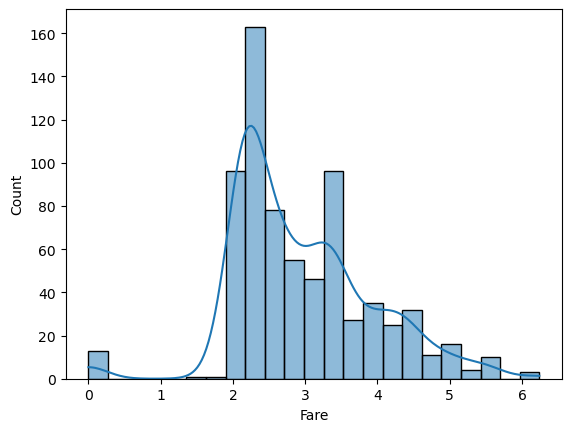

In [227]:
sns.histplot(X_train_transformed['Fare'], kde=True)

In [228]:
# Making predictions using tr
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

pred1 = clf1.predict(X_test_transformed)
pred2 = clf2.predict(X_test_transformed)

accuracy3 = accuracy_score(y_test, pred1)
accuracy4 = accuracy_score(y_test, pred2)

In [229]:
print("Accuracy score after applying FunctionTransformer from Logistic Regression: ", accuracy3)
print("Accuracy score after applying FunctionTransformer from Decision Tree Classifier: ", accuracy4)

Accuracy score after applying FunctionTransformer from Logistic Regression:  0.6815642458100558
Accuracy score after applying FunctionTransformer from Decision Tree Classifier:  0.6703910614525139


In [230]:
# Cross-validating our model to make sure that the accuracy measure is correct, and the model performs well on the overall data.
X_transformed = trans.fit_transform(X)
lr = LogisticRegression()
dt = DecisionTreeClassifier()

print('LogisticRegression:', np.mean(cross_val_score(lr, X_transformed, y, scoring='accuracy', cv=10)))
print('DecisionTreeClassifier:', np.mean(cross_val_score(dt, X_transformed, y, scoring='accuracy', cv=10)))

LogisticRegression: 0.678027465667915
DecisionTreeClassifier: 0.6543695380774033


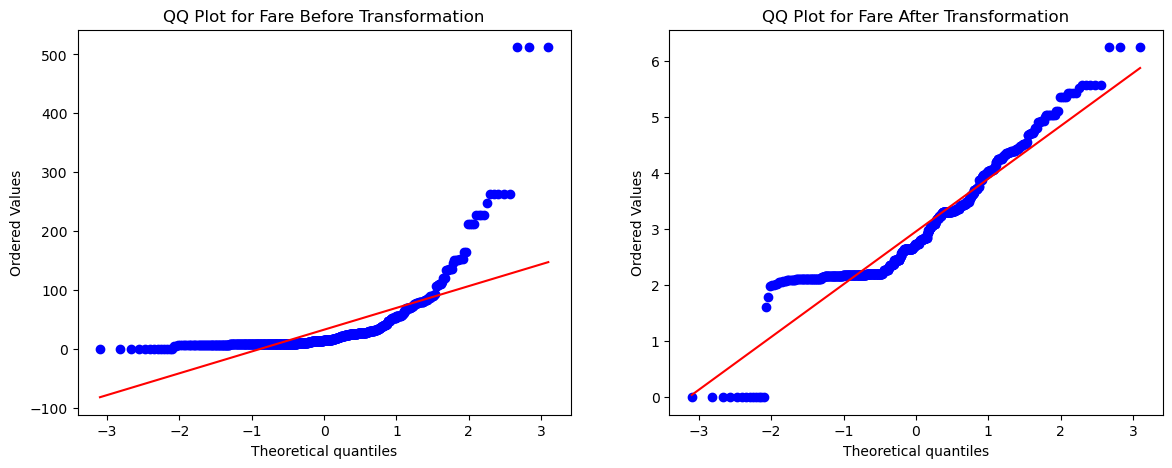

In [252]:
# Compare the plots, before and after transformation on Fare column
plt.figure(figsize=(14, 5))

plt.subplot(121)
stats.probplot(X_train['Fare'], plot=plt)
plt.title("QQ Plot for Fare Before Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], plot=plt)
plt.title("QQ Plot for Fare After Transformation")

plt.show()

This graph shows that the data points are more transformed towards normal distribution.